In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [12]:
df = pd.read_excel("data/Data23.xlsx")
df.head(10)

,TransactionID,UserID,DateTime,ProductID,Channel,PaymentType,Price,Discount
0,1,500546547,2017-01-01 01:40:39,10334,MOBILE,Cash,51.00,No
1,2,500240813,2017-01-01 03:27:58,10610,WEB,Cash,108.00,No
2,3,500460527,2017-01-01 04:42:47,10579,MOBILE,Cash,22.50,No
3,4,500338383,2017-01-01 06:25:01,10720,WEB,Mobile Payment,42.00,No
4,5,500591427,2017-01-01 11:19:42,10677,MOBILE,Mobile Payment,59.70,No
5,6,500335677,2017-01-01 11:41:58,10677,MOBILE,Mobile Payment,89.70,No
6,7,500431839,2017-01-01 12:03:38,10173,MOBILE,Cash,30.00,No
7,8,500308309,2017-01-01 12:03:58,10506,MOBILE,Cash,101.49,No
8,9,500263440,2017-01-01 12:14:56,10561,MOBILE,Cash,228.00,No
9,10,500489028,2017-01-01 12:21:54,10561,MOBILE,Cash,138.00,No


In [13]:
df['UserID'].value_counts()

500338383    698
500454268    443
500301456    405
500599622    371
500450451    296
            ... 
500291369      1
500487697      1
500447371      1
500547581      1
500283955      1
Name: UserID, Length: 3581, dtype: int64

In [14]:
df.info

<bound method DataFrame.info of        TransactionID     UserID            DateTime  ProductID Channel  \
0                  1  500546547 2017-01-01 01:40:39      10334  MOBILE   
1                  2  500240813 2017-01-01 03:27:58      10610     WEB   
2                  3  500460527 2017-01-01 04:42:47      10579  MOBILE   
3                  4  500338383 2017-01-01 06:25:01      10720     WEB   
4                  5  500591427 2017-01-01 11:19:42      10677  MOBILE   
...              ...        ...                 ...        ...     ...   
69059          69060  500527737 2018-06-30 22:44:08      10696  MOBILE   
69060          69061  500398938 2018-06-30 23:04:05      10541  MOBILE   
69061          69062  500367467 2018-06-30 23:08:46      10526  MOBILE   
69062          69063  500268709 2018-06-30 23:39:24      10680     WEB   
69063          69064  500301456 2018-06-30 23:56:15      10224     WEB   

              PaymentType   Price Discount  
0                    Cash   51.00 

In [15]:
df['DateTime']

0       2017-01-01 01:40:39
1       2017-01-01 03:27:58
2       2017-01-01 04:42:47
3       2017-01-01 06:25:01
4       2017-01-01 11:19:42
                ...        
69059   2018-06-30 22:44:08
69060   2018-06-30 23:04:05
69061   2018-06-30 23:08:46
69062   2018-06-30 23:39:24
69063   2018-06-30 23:56:15
Name: DateTime, Length: 69064, dtype: datetime64[ns]

In [16]:
period1 = df.loc[(df['DateTime'].dt.month <= 9) & (df['DateTime'].dt.year <= 2017)]
period2 = df.loc[ df['DateTime'] >= '2017-10-01']

In [17]:
six_month =period1[period1['DateTime'].dt.month <= 6]['UserID']
three_month= period1[(period1['DateTime'].dt.month > 6) & (period1['DateTime'].dt.month <= 9)]['UserID']

In [18]:

churned_users = six_month[(~six_month.isin(three_month))].unique()
active_users = six_month[(six_month.isin(three_month))].unique()

In [19]:

period1['Churn'] = period1['UserID'].apply(lambda x: 1 if x in churned_users else 0)

/var/folders/dm/vlb3lrsn2kgg0bxkkw0vb53c0000gn/T/ipykernel_4818/1929937271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period1['Churn'] = period1['UserID'].apply(lambda x: 1 if x in churned_users else 0)


In [20]:
period1

,TransactionID,UserID,DateTime,ProductID,Channel,PaymentType,Price,Discount,Churn
0,1,500546547,2017-01-01 01:40:39,10334,MOBILE,Cash,51.00,No,0
1,2,500240813,2017-01-01 03:27:58,10610,WEB,Cash,108.00,No,0
2,3,500460527,2017-01-01 04:42:47,10579,MOBILE,Cash,22.50,No,0
3,4,500338383,2017-01-01 06:25:01,10720,WEB,Mobile Payment,42.00,No,0
4,5,500591427,2017-01-01 11:19:42,10677,MOBILE,Mobile Payment,59.70,No,0
...,...,...,...,...,...,...,...,...,...
29545,29546,500505033,2017-09-30 22:18:18,10445,WEB,Cash,19.50,No,0
29546,29547,500517606,2017-09-30 22:27:33,10489,MOBILE,Mobile Payment,194.67,No,0
29547,29548,500602691,2017-09-30 22:39:24,10372,MOBILE,Cash,46.80,No,0
29548,29549,500474684,2017-09-30 22:49:35,10534,MOBILE,Cash,27.00,No,0


In [21]:

yr = df[df['DateTime'].dt.year <= 2017]
gr = yr[['UserID','DateTime']]
N = 5  # replace with the desired number of users
top_users = gr['UserID'].value_counts().nlargest(N).index.tolist()

# Filter the dataframe to include only the data for the top users
df_top_users = gr[gr['UserID'].isin(top_users)].reset_index()
df_top_users.pop('index')

0           3
1          33
2          65
3          72
4          84
        ...  
1314    40125
1315    40156
1316    40167
1317    40199
1318    40230
Name: index, Length: 1319, dtype: int64

In [22]:
df_top_users

,UserID,DateTime
0,500338383,2017-01-01 06:25:01
1,500301456,2017-01-01 15:46:15
2,500532863,2017-01-01 18:45:21
3,500338383,2017-01-01 19:15:07
4,500599622,2017-01-01 20:30:39
...,...,...
1314,500338383,2017-12-31 11:49:25
1315,500301456,2017-12-31 15:15:45
1316,500338383,2017-12-31 16:09:19
1317,500338383,2017-12-31 18:05:27


In [23]:
scatter = df_top_users.groupby(df_top_users['DateTime'].dt.month)['UserID'].value_counts()

In [24]:
new_data= scatter.unstack()
new_data = new_data.fillna(0)

In [25]:
data = new_data

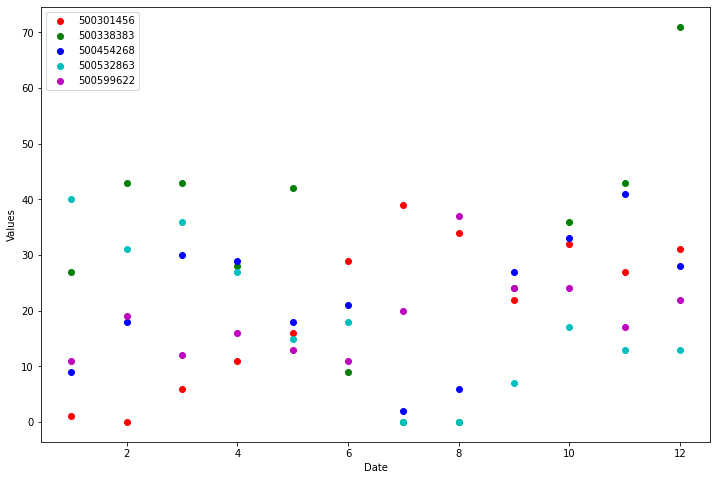

In [26]:
# Create a scatter plot
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['r', 'g', 'b', 'c', 'm']
for i, user_id in enumerate(data.columns):
    ax.scatter(data.index, data[user_id], c=colors[i%len(colors)], label=user_id)

# Add labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Values')
ax.legend()

# Show the plot
plt.show()